In [1]:
import numpy as np
import sys
sys.path.append("..") 
import cab
import matplotlib.pyplot as plt

/home/rsujatha/MEGA/SubhaSelfCal/CAB


### load transfer function

In [2]:
kbyh,Tfn= np.loadtxt('cambTf_Om0.231_Ol0.724_Ob0.045_h0.700_ns0.961_z0.dat',usecols=[0,1],unpack = True)

In [3]:
cab = cab.cosmology(kbyh=kbyh,Tfn=Tfn)
m = np.logspace(12,15,30)
nu0 = cab.PeakHeight(m,z=0)
nu1 = cab.PeakHeight(m,z=1)
t10_z0 = cab.T10(m,0)
t10_z1 = cab.T10(m,1)

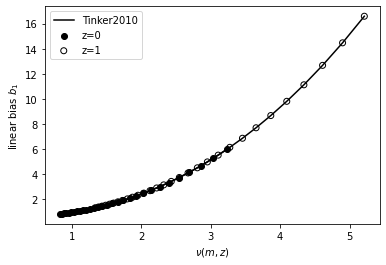

In [4]:
fig = plt.figure(1)
ax1 = plt.scatter(nu0,t10_z0,color='k',label='z=0')
ax2 = plt.scatter(nu1,t10_z1,color='k',facecolors='none',label='z=1')
plt.plot(nu0,t10_z0,color='k',label='Tinker2010')
plt.plot(nu1,t10_z1,color='k')
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('linear bias $b_{1}$')
plt.legend()
plt.show()

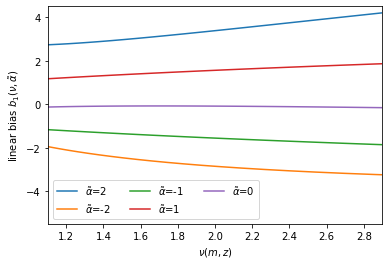

In [5]:
plt.plot(nu0,cab.b1avg(m,0,2)-t10_z0,label=r'$\tilde{\alpha}$=2')
plt.plot(nu0,cab.b1avg(m,0,-2)-t10_z0,label=r'$\tilde{\alpha}$=-2')
plt.plot(nu0,cab.b1avg(m,0,-1)-t10_z0,label=r'$\tilde{\alpha}$=-1')
plt.plot(nu0,cab.b1avg(m,0,1)-t10_z0,label=r'$\tilde{\alpha}$=1')
plt.plot(nu0,cab.b1avg(m,0,0)-t10_z0,label=r'$\tilde{\alpha}$=0')
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel(r'linear bias $b_{1}(\nu,\tilde{\alpha})$')
plt.ylim([-5.5,4.5])
plt.xlim([1.1,2.9])
plt.legend(loc='lower left', ncol=3)
plt.show()

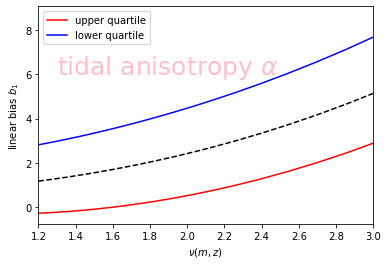

In [6]:
b1avg_upquart = cab.b1avg(m,0,0.675,np.inf)
b1avg_lowquart = cab.b1avg(m,0,-0.675,-np.inf)
plt.plot(nu0,b1avg_lowquart,color='red',label='upper quartile')
plt.plot(nu0,b1avg_upquart,color='blue',label='lower quartile')
ax1 = plt.plot(nu0,t10_z0,color='k',linestyle='--')
plt.text(1.3,6,r'tidal anisotropy $\alpha$',color='pink',fontsize=25)
plt.xlabel(r'$\nu(m,z)$')
plt.xlim([1.2,3])
plt.ylabel('linear bias $b_1$')
plt.legend()
plt.show()

In [7]:
b2avg = cab.b2avg(m,0,None)
b2avg_upquart = cab.b2avg(m,0,0.675,np.inf)
b2avg_lowquart = cab.b2avg(m,0,-0.675,-np.inf)

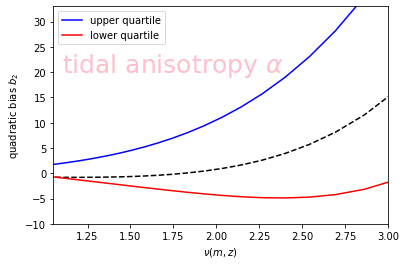

In [8]:
plt.plot(nu0,b2avg,color='k',linestyle='--')
plt.plot(nu0,b2avg_upquart,color='blue',label='upper quartile')
plt.plot(nu0,b2avg_lowquart,color='red',label='lower quartile')
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('quadratic bias $b_{2}$')
plt.text(1.1,20,r'tidal anisotropy $\alpha$',color='pink',fontsize=25)
plt.xlim([1.05,3])
plt.ylim([-10,33])
plt.legend()
plt.show()

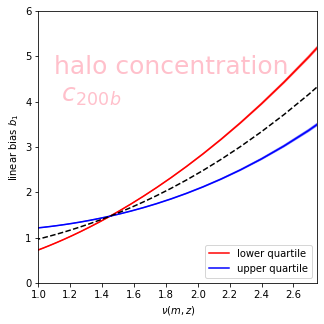

In [9]:
b1_conc_upper_quartile,eu = cab.b1_c_from_alpha('c200b',m,0,0.675,np.inf)
b1_conc_lower_quartile,el = cab.b1_c_from_alpha('c200b',m,0,-0.675,-np.inf)
fig = plt.figure(figsize=(5,5))
plt.plot(nu0,b1_conc_lower_quartile,color='red',label='lower quartile')
plt.fill_between(nu0, b1_conc_lower_quartile-el, b1_conc_lower_quartile+el,color='red',alpha=0.4)
plt.fill_between(nu0, b1_conc_upper_quartile-eu, b1_conc_upper_quartile+eu,color='blue',alpha=0.4)
plt.plot(nu0,b1_conc_upper_quartile,color='blue',label='upper quartile')
ax1 = plt.plot(nu0,t10_z0,color='k',linestyle='--')
plt.xlim([1.0,2.75])
plt.ylim([0,6])
plt.text(1.1,4,'halo concentration \n $c_{200b}$',color='pink',fontsize=25)
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('linear bias $b_{1}$')
plt.legend(loc='lower right')
plt.show()




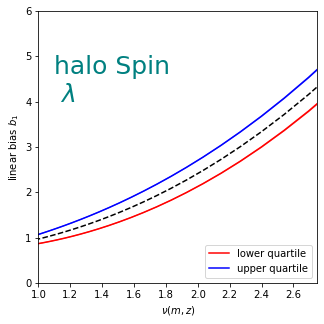

In [10]:
b1_conc_upper_quartile,eu = cab.b1_c_from_alpha('Spin',m,0,0.675,np.inf)
b1_conc_lower_quartile,el = cab.b1_c_from_alpha('Spin',m,0,-0.675,-np.inf)
fig = plt.figure(figsize=(5,5))
plt.plot(nu0,b1_conc_lower_quartile,color='red',label='lower quartile')
plt.fill_between(nu0, b1_conc_lower_quartile-el, b1_conc_lower_quartile+el,color='red',alpha=0.4)
plt.fill_between(nu0, b1_conc_upper_quartile-eu, b1_conc_upper_quartile+eu,color='blue',alpha=0.4)
plt.plot(nu0,b1_conc_upper_quartile,color='blue',label='upper quartile')
ax1 = plt.plot(nu0,t10_z0,color='k',linestyle='--')
plt.xlim([1.0,2.75])
plt.ylim([0,6])
plt.text(1.1,4,'halo Spin \n $\lambda$',color='teal',fontsize=25)
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('linear bias $b_{1}$')
plt.legend(loc='lower right')
plt.show()



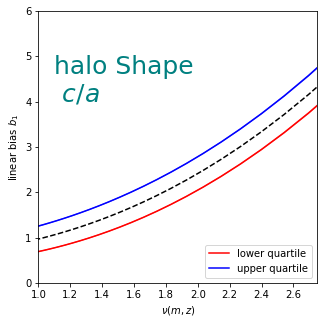

In [11]:
b1_conc_upper_quartile,eu = cab.b1_c_from_alpha('c_to_a',m,0,0.675,np.inf)
b1_conc_lower_quartile,el = cab.b1_c_from_alpha('c_to_a',m,0,-0.675,-np.inf)
fig = plt.figure(figsize=(5,5))
plt.plot(nu0,b1_conc_lower_quartile,color='red',label='lower quartile')
plt.fill_between(nu0, b1_conc_lower_quartile-el, b1_conc_lower_quartile+el,color='red',alpha=0.4)
plt.fill_between(nu0, b1_conc_upper_quartile-eu, b1_conc_upper_quartile+eu,color='blue',alpha=0.4)
plt.plot(nu0,b1_conc_upper_quartile,color='blue',label='upper quartile')
ax1 = plt.plot(nu0,t10_z0,color='k',linestyle='--')
plt.xlim([1.0,2.75])
plt.ylim([0,6])
plt.text(1.1,4,'halo Shape \n $c/a$',color='teal',fontsize=25)
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('linear bias $b_{1}$')
plt.legend(loc='lower right')
plt.show()



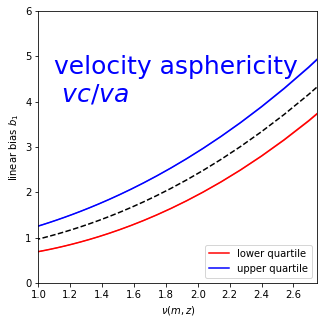

In [12]:
b1_conc_upper_quartile,eu = cab.b1_c_from_alpha('vc_to_va',m,0,0.675,np.inf)
b1_conc_lower_quartile,el = cab.b1_c_from_alpha('vc_to_va',m,0,-0.675,-np.inf)
fig = plt.figure(figsize=(5,5))
plt.plot(nu0,b1_conc_lower_quartile,color='red',label='lower quartile')
plt.fill_between(nu0, b1_conc_lower_quartile-el, b1_conc_lower_quartile+el,color='red',alpha=0.4)
plt.fill_between(nu0, b1_conc_upper_quartile-eu, b1_conc_upper_quartile+eu,color='blue',alpha=0.4)
plt.plot(nu0,b1_conc_upper_quartile,color='blue',label='upper quartile')
ax1 = plt.plot(nu0,t10_z0,color='k',linestyle='--')
plt.xlim([1.0,2.75])
plt.ylim([0,6])
plt.text(1.1,4,'velocity asphericity \n $vc/va$',color='blue',fontsize=25)
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('linear bias $b_{1}$')
plt.legend(loc='lower right')
plt.show()


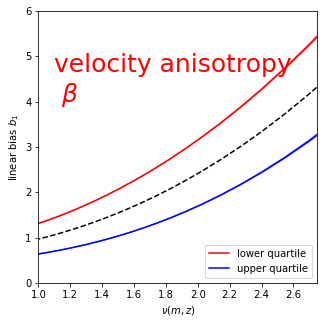

In [13]:
b1_conc_upper_quartile,eu = cab.b1_c_from_alpha('beta',m,0,0.675,np.inf)
b1_conc_lower_quartile,el = cab.b1_c_from_alpha('beta',m,0,-0.675,-np.inf)
fig = plt.figure(figsize=(5,5))
plt.plot(nu0,b1_conc_lower_quartile,color='red',label='lower quartile')
plt.fill_between(nu0, b1_conc_lower_quartile-el, b1_conc_lower_quartile+el,color='red',alpha=0.4)
plt.fill_between(nu0, b1_conc_upper_quartile-eu, b1_conc_upper_quartile+eu,color='blue',alpha=0.4)
plt.plot(nu0,b1_conc_upper_quartile,color='blue',label='upper quartile')
ax1 = plt.plot(nu0,t10_z0,color='k',linestyle='--')
plt.xlim([1.0,2.75])
plt.ylim([0,6])
plt.text(1.1,4,'velocity anisotropy \n $\\beta$',color='red',fontsize=25)
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('linear bias $b_{1}$')
plt.legend(loc='lower right')
plt.show()


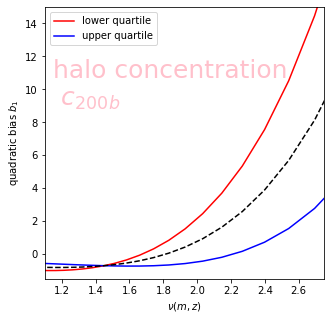

In [14]:
b2_conc_upper_quartile,e = cab.b2_c_from_alpha('c200b',m,0,0.675,np.inf)
b2_conc_lower_quartile,e = cab.b2_c_from_alpha('c200b',m,0,-0.675,-np.inf)
fig = plt.figure(figsize=(5,5))
plt.plot(nu0,b2_conc_lower_quartile,color='red',label='lower quartile')
plt.plot(nu0,b2_conc_upper_quartile,color='blue',label='upper quartile')
ax1 = plt.plot(nu0,b2avg,color='k',linestyle='--')
plt.text(1.15,9,'halo concentration \n $c_{200b}$',color='pink',fontsize=25)
plt.ylim([-1.5,15])
plt.xlim([1.1,2.75])
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('quadratic bias $b_{1}$')
plt.legend()
plt.show()

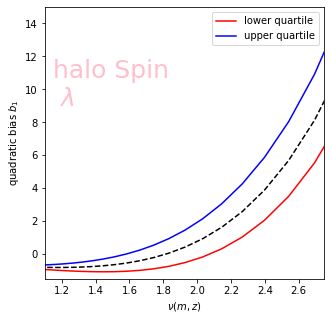

In [15]:
b2_conc_upper_quartile,e = cab.b2_c_from_alpha('Spin',m,0,0.675,np.inf)
b2_conc_lower_quartile,e = cab.b2_c_from_alpha('Spin',m,0,-0.675,-np.inf)
fig = plt.figure(figsize=(5,5))
plt.plot(nu0,b2_conc_lower_quartile,color='red',label='lower quartile')
plt.plot(nu0,b2_conc_upper_quartile,color='blue',label='upper quartile')
ax1 = plt.plot(nu0,b2avg,color='k',linestyle='--')
plt.text(1.15,9,'halo Spin \n $\\lambda$',color='pink',fontsize=25)
plt.ylim([-1.5,15])
plt.xlim([1.1,2.75])
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('quadratic bias $b_{1}$')
plt.legend()
plt.show()

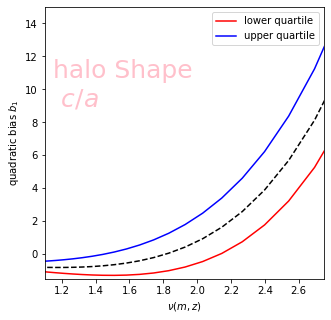

In [16]:
b2_conc_upper_quartile,e = cab.b2_c_from_alpha('c_to_a',m,0,0.675,np.inf)
b2_conc_lower_quartile,e = cab.b2_c_from_alpha('c_to_a',m,0,-0.675,-np.inf)
fig = plt.figure(figsize=(5,5))
plt.plot(nu0,b2_conc_lower_quartile,color='red',label='lower quartile')
plt.plot(nu0,b2_conc_upper_quartile,color='blue',label='upper quartile')
ax1 = plt.plot(nu0,b2avg,color='k',linestyle='--')
plt.text(1.15,9,'halo Shape \n $c/a$',color='pink',fontsize=25)
plt.ylim([-1.5,15])
plt.xlim([1.1,2.75])
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('quadratic bias $b_{1}$')
plt.legend()
plt.show()

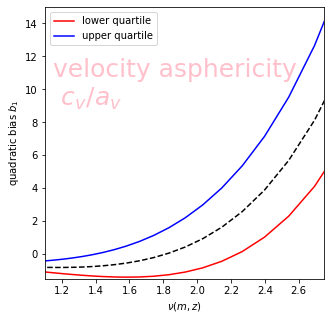

In [18]:
b2_conc_upper_quartile,e = cab.b2_c_from_alpha('vc_to_va',m,0,0.675,np.inf)
b2_conc_lower_quartile,e = cab.b2_c_from_alpha('vc_to_va',m,0,-0.675,-np.inf)
fig = plt.figure(figsize=(5,5))
plt.plot(nu0,b2_conc_lower_quartile,color='red',label='lower quartile')
plt.plot(nu0,b2_conc_upper_quartile,color='blue',label='upper quartile')
ax1 = plt.plot(nu0,b2avg,color='k',linestyle='--')
plt.text(1.15,9,'velocity asphericity \n $c_{v}/a_{v}$',color='pink',fontsize=25)
plt.ylim([-1.5,15])
plt.xlim([1.1,2.75])
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('quadratic bias $b_{1}$')
plt.legend()
plt.show()

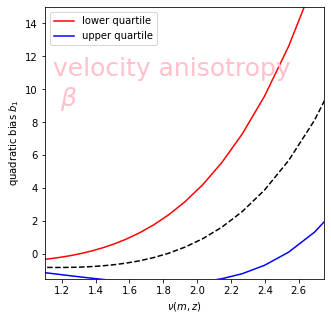

In [19]:
b2_conc_upper_quartile,e = cab.b2_c_from_alpha('beta',m,0,0.675,np.inf)
b2_conc_lower_quartile,e = cab.b2_c_from_alpha('beta',m,0,-0.675,-np.inf)
fig = plt.figure(figsize=(5,5))
plt.plot(nu0,b2_conc_lower_quartile,color='red',label='lower quartile')
plt.plot(nu0,b2_conc_upper_quartile,color='blue',label='upper quartile')
ax1 = plt.plot(nu0,b2avg,color='k',linestyle='--')
plt.text(1.15,9,'velocity anisotropy \n $\\beta$',color='pink',fontsize=25)
plt.ylim([-1.5,15])
plt.xlim([1.1,2.75])
plt.xlabel(r'$\nu(m,z)$')
plt.ylabel('quadratic bias $b_{1}$')
plt.legend()
plt.show()